# CAPSTONE PROJECT 2
# SENTIMENT ANALYSIS

* Problem Statement
* Data Source
* Sentiment Analysis  
* Importing required libraries
* Importing API keys and accessing Twitter API to retrieve tweets
* Retrieving the top 500 tweets which have the words "KTR" and "TRS"
* Data Cleaning using Regular Expressions
* EDA
  - Finding the 15 most frequent words
  - Finding maximum and minimum word length in the tweets
  - Plotting histogram with length of the words
  - Plotting horizontal bar graph for most common words found in Tweets
  - Word Cloud
* How Text Blob Works:
  - Polarity
  - Subjectivity
* Creating a function to compute the negative, neutral and positive analysis
* Print all of the positive tweets
* Print all of the negative tweets 
* Plot the polarity and subjectivity
* Get the percentage of positive tweets
* Get the percentage of negative tweets
* Percentage of neutral sentiment
* Plot and visualize the counts
* CONCLUSION
* FUTURE STEPS

# Problem Statement

* Need to predict sentiment of the TRS party in GHMC Elections

# Data Source

* Using the top 500 tweets based on the words 'TRS' and TRS working president 'KTR' from Twitter

# Sentiment Analysis

Sentiment analysis is the interpretation and classification of emotions (positive, negative and neutral) 
within text data using text analysis techniques . Here I have used Natural Language Processing techniques.

# Importing required libraries

* Tweepy is the Python library for accessing the Twitter API
* TextBlob is a Python library for processing textual data. 
  It provides a simple API for diving into common natural language processing (NLP) tasks 
  such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more.
* Word Cloud is a data visualization technique used for representing text data in which 
  the size of each word indicates its frequency or importance. 
  Significant textual data points can be highlighted using a word cloud. 
  Word clouds are widely used for analyzing data from social network websites.
    


In [266]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


# Importing API keys and accessing Twitter API to retrieve tweets

In [267]:
log = pd.read_csv('E:/Data Science/Book1_API_KEYS.csv')
consumer_key = log['key'][0]
consumer_secret = log['key'][1]
access_token = log['key'][2]
access_token_secret = log['key'][3]
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

# Retrieving the top 500 tweets which have the words "KTR" and "TRS"

In [268]:
posts1 = api.search(["KTR", "TRS"], count = 500, lang="en", tweet_mode="extended")
for tweet in posts1[0:5]:
    print(tweet.full_text + '\n')


df = pd.DataFrame([tweet.full_text for tweet in posts1], columns=['Tweets'])
df.head()

Shame on democrocy. Trs working president and state cabinet minister Ktr killed democrocy by having two votes in a state. Pls take necessary action up on him.
@CEO_Telangana @rashtrapatibhvn @electioncomissionofindia https://t.co/rTBDa6VZgZ

RT @SpiritOfCongres: CM KCR says TRS and MIM are friends.

His son KTR says they are not friends. 

We say TRS, MIM &amp; BJP are in Friends wi…

@its_kumarvikash @KTRTRS Well for his oratory skills, he is one of the best. But their position on AIMIM is what makes it all dicey. Wish TRS becomes part of NDA and KTR becomes a central minister someday.

RT @KVishReddy: Massive distribution of money in different parts of GHMC by TRS party

Money earned thru filthy means by KCR KTR

Local lea…

RT @prakashraaj: Dear Hyderabad.... it’s your power...your right..and your CONSCIENCE.....to DECIDE. do you want a peaceful HYDERABAD.. #GH…



,Tweets
0,Shame on democrocy. Trs working president and ...
1,RT @SpiritOfCongres: CM KCR says TRS and MIM a...
2,@its_kumarvikash @KTRTRS Well for his oratory ...
3,RT @KVishReddy: Massive distribution of money ...
4,RT @prakashraaj: Dear Hyderabad.... it’s your ...


# Data Cleaning using Regular Expressions

* A RegEx, or Regular Expression, is a sequence of characters that forms a search pattern. 
  RegEx can be used to check if a string contains the specified search pattern and do some manupulations like substitution,
  removal etc.

In [269]:
# clean the text
def cleanTxt(text):    
    text = re.sub(r'@[A-Za-z0-9]+', '', text)  #removes @mentions
    text = re.sub(r'#', '', text)  #removing hashtag symbols
    text = re.sub(r'RT[\s]+', '', text) # removes RT sub leaf and follwed by white spaces
    text = re.sub(r'https?:\/\/S+', '', text) # removes the hyper link
  
    return text
#cleaning or applying the cleaning text function
df['Tweets'] = df['Tweets'].apply(cleanTxt)

#Show the cleaned text
df

,Tweets
0,Shame on democrocy. Trs working president and ...
1,: CM KCR says TRS and MIM are friends.\n\nHis ...
2,"_kumarvikash Well for his oratory skills, he ..."
3,: Massive distribution of money in different p...
4,: Dear Hyderabad.... it’s your power...your ri...
...,...
95,: Dear Hyderabad.... it’s your power...your ri...
96,: Stakes high for KTR who has been the face of...
97,: Dear Hyderabad.... it’s your power...your ri...
98,_: AttackOnBandiSanjay is a result of frustrat...


# EDA

* Finding the 10 most frequent words

In [270]:
import nltk 
from nltk.tokenize import word_tokenize
from collections import Counter
word2count = {} 
for data in df['Tweets']: 
    words = nltk.word_tokenize(data) 
    for word in words: 
        if word not in word2count.keys(): 
            word2count[word] = 1
        else: 
            word2count[word] += 1
# Create counter
counts = collections.Counter(word2count)
counts.most_common(15)

[('.', 133),
 (':', 83),
 ('TRS', 69),
 ('KTR', 66),
 ('...', 63),
 ('your', 63),
 ('of', 59),
 ('for', 44),
 (',', 41),
 ('is', 37),
 ('a', 36),
 ('and', 33),
 ('Hyderabad', 30),
 ('vote', 29),
 ('the', 26)]

* Finding maximum and minimum word length in the tweets

In [271]:
word_lengths = [len(w) for w in words]
print(r'max word length is:', max(word_lengths))
print(r'min word length is:', min(word_lengths))

max word length is: 17
min word length is: 1


* Plotting histogram with length of the words

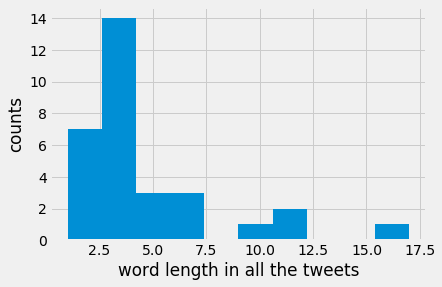

In [272]:
plt.hist(word_lengths)
plt.xlabel('word length in all the tweets')
plt.ylabel('counts')
plt.show()

* Plotting horizontal bar graph for most common words found in Tweets

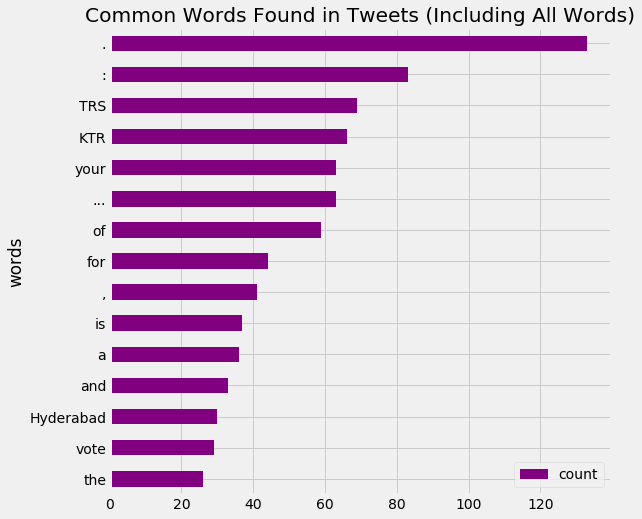

In [273]:
clean_tweets_no_urls = pd.DataFrame(counts.most_common(15),
                             columns=['words', 'count'])

clean_tweets_no_urls.head()
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_no_urls.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Including All Words)")

plt.show()

# Word Cloud

* Word Cloud is a visualization technique for text data wherein each word 
  is picturized with its importance in the context or its frequency.

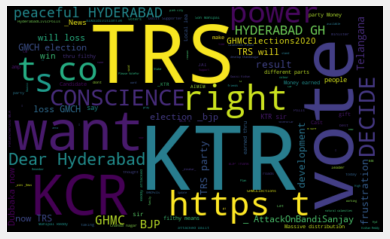

In [274]:
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width = 500, height=300, random_state = 21,
max_font_size =119).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off') #remove the axis
plt.show()

# How Text Blob Works:

TextBlob is a Python library for processing textual data. It provides a simple API for diving into common natural language processing (NLP)
tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more.
Here we used this for sentiment analysis.
The sentiment function of textblob returns two properties, polarity, and subjectivity. 

# Polarity 
Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement.

# Subjectivity
Subjectivity is also a float which lies in the range of [0,1]. 
In natural language, subjectivity refers to expression of opinions, evaluations, feelings, and speculations

In [275]:
#create a function to get subjectivity and polarities
#Subjectivity tells how subjective is the tweet
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#create a fucntion to get the polarity
# the polarity tells how positive or negative the text is
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Create two new columns
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)



In [276]:
#Showing the new dataframe
df.head()

,Tweets,Subjectivity,Polarity
0,Shame on democrocy. Trs working president and ...,0.366667,-0.033333
1,: CM KCR says TRS and MIM are friends.\n\nHis ...,0.000000,0.000000
2,"_kumarvikash Well for his oratory skills, he ...",0.275000,0.500000
3,: Massive distribution of money in different p...,0.650000,-0.200000
4,: Dear Hyderabad.... it’s your power...your ri...,0.500000,0.250000


# Creating a function to compute the negative, neutral and positive analysis

In [277]:
 
def getAnalysis(score):
   if score < 0:
      return 'Negative'
   elif score == 0:
      return 'Neutral'
   else:
      return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)

#Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,Shame on democrocy. Trs working president and ...,0.366667,-0.033333,Negative
1,: CM KCR says TRS and MIM are friends.\n\nHis ...,0.000000,0.000000,Neutral
2,"_kumarvikash Well for his oratory skills, he ...",0.275000,0.500000,Positive
3,: Massive distribution of money in different p...,0.650000,-0.200000,Negative
4,: Dear Hyderabad.... it’s your power...your ri...,0.500000,0.250000,Positive
...,...,...,...,...
95,: Dear Hyderabad.... it’s your power...your ri...,0.500000,0.250000,Positive
96,: Stakes high for KTR who has been the face of...,0.420000,0.130000,Positive
97,: Dear Hyderabad.... it’s your power...your ri...,0.500000,0.250000,Positive
98,_: AttackOnBandiSanjay is a result of frustrat...,0.000000,0.000000,Neutral


# Print all of the positive tweets

In [278]:
j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] == 'Positive'):
        print(str(j) + ') '+sortedDF['Tweets'][i])
        print()
        j = j+1

1) _kumarvikash  Well for his oratory skills, he is one of the best. But their position on AIMIM is what makes it all dicey. Wish TRS becomes part of NDA and KTR becomes a central minister someday.

2) : Dear Hyderabad.... it’s your power...your right..and your CONSCIENCE.....to DECIDE. do you want a peaceful HYDERABAD.. GH…

3) _ajay Sir are you minister of your constancy or whole Telangana? Once look into village roads ,,,,,,,,we expect only lacks not crores like Ragunadapalem ..
TRS BJP jansena pspk KHAMMAM KTR pspk Telangana tv9, v6

4) : Dear Hyderabad.... it’s your power...your right..and your CONSCIENCE.....to DECIDE. do you want a peaceful HYDERABAD.. GH…

5) :   Din't TRS get enough time for new Plan of Drainage?
2Cm rain makes Hyd, roads Mini tanks,
Why on…

6) _SudheerReddy   KTR please respond on the news "TRS karyakartas distributing money". 
Is that true??

7) : Dear Hyderabad.... it’s your power...your right..and your CONSCIENCE.....to DECIDE. do you want a peaceful HYDE

# Print all of the negative tweets 

In [279]:
# Print all of the negative tweets , shape[0] gives no. of rows
j=1
sortedDF = df.sort_values(by=['Polarity'], ascending='False')
for i in range(0, sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] == 'Negative'):
        print(str(j) + ') '+ sortedDF['Tweets'][i])
        print() # print new line
        j = j+1

1) Shame on democrocy. Trs working president and state cabinet minister Ktr killed democrocy by having two votes in a state. Pls take necessary action up on him.
_Telangana   https://t.co/rTBDa6VZgZ

2) : Massive distribution of money in different parts of GHMC by TRS party

Money earned thru filthy means by KCR KTR

Local lea…

3) : Massive distribution of money in different parts of GHMC by TRS party

Money earned thru filthy means by KCR KTR

Local lea…

4) : Massive distribution of money in different parts of GHMC by TRS party

Money earned thru filthy means by KCR KTR

Local lea…

5)    _111  What numbers? All trs politician colleges increasing fees and making stupid colleges into universities.. A trs party member's son lost both his parents and brother because of negligence by the hospitals in Telangana, he even tweeted KTR.

6) KTR
 *The government should make it mandatory that if any family without proper reason refrains from voting should be isolated and cut the essential supp

# Plot the polarity and subjectivity

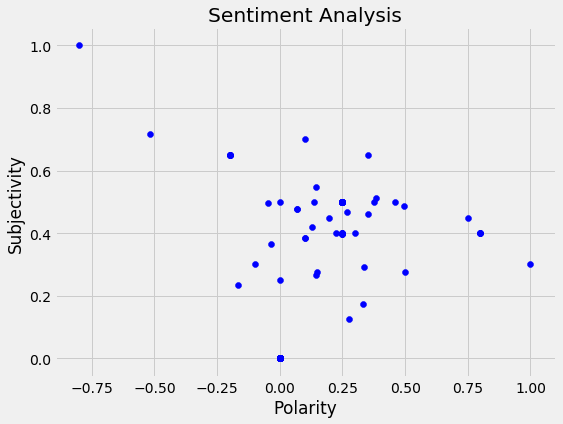

In [280]:
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

# Get the percentage of positive tweets

In [281]:
pos_tweets = df[df.Analysis == 'Positive']
pos_tweets = pos_tweets['Tweets']
pos_tweets
round((pos_tweets.shape[0] / df.shape[0]) *100 , 2)

53.0

# Get the percentage of negative tweets

In [282]:
neg_tweets = df[df.Analysis == 'Negative']
neg_tweets = neg_tweets['Tweets']
neg_tweets
round((neg_tweets.shape[0] / df.shape[0]) *100 , 2)

12.0

# Percentage of neutral sentiment

In [283]:
neutral_tweets = df[df.Analysis == 'Neutral']
neutral_tweets = neutral_tweets['Tweets']
#Just printing
neutral_tweets
round((neutral_tweets.shape[0] / df.shape[0]) *100 , 1)

35.0

# Plot and visualize the counts

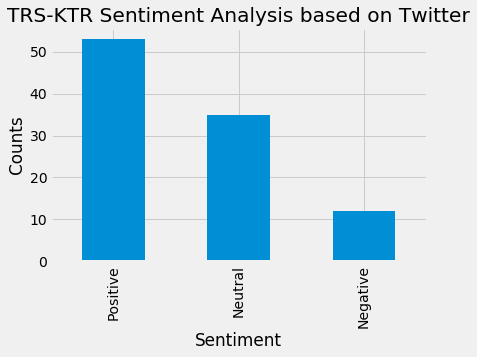

In [284]:
df['Analysis'].value_counts()
plt.title('TRS-KTR Sentiment Analysis based on Twitter')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()

# CONCLUSION:

* This Sentiment Analysis shows that the TRS party for which KTR is the working president has a positive sentiment 
  and has an edge to win the current GHMC elections.
* TRS party has a positive sentiment of 55 percent currently
* 'TRS' party has a largest word count of 74 times and 'KTR' has a second largest count of 72 times as per the 
   top 500 public twitter tweets

# FUTURE STEPS:

This analysis can be used for any sentiment prediction by taking the most significant words to know the sentiment towards
that specific topic
for example, 
- COVID-19 research progress
- Sentiment towards a specific movie
- Knowing sentiment towards a newly lauched product and taking measures to increase sales
- Knowing sentiment towards a brand name etc.